In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

In [32]:
data = pd.read_csv('student_sleep_patterns.csv')
data

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,2nd Year,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,Male,2nd Year,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,Male,3rd Year,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,Female,2nd Year,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


Описание датасета

In [33]:
data.shape

(500, 14)

In [34]:
data.describe(include='all')

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,3rd Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,186,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,250.500000,21.53600,NaN,NaN,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,NaN,NaN,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,NaN,NaN,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,NaN,NaN,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,NaN,NaN,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,NaN,NaN,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


Заменим категориальные признаки на числовые

In [37]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['University_Year'] = label_encoder.fit_transform(data['University_Year'])
data

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,1,0,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,1,3,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,2,3,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,1,3,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,1,1,5.1,9.3,1.9,4,110,4,17.42,8.43,6.93,10.78
496,497,20,1,1,8.9,7.7,3.5,3,40,4,1.22,15.54,5.85,7.23
497,498,21,1,2,5.7,6.4,3.9,1,68,10,9.94,2.25,5.46,10.72
498,499,18,0,1,4.9,0.5,3.5,0,12,2,19.10,15.49,8.35,7.20


In [38]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End'],
      dtype='object')

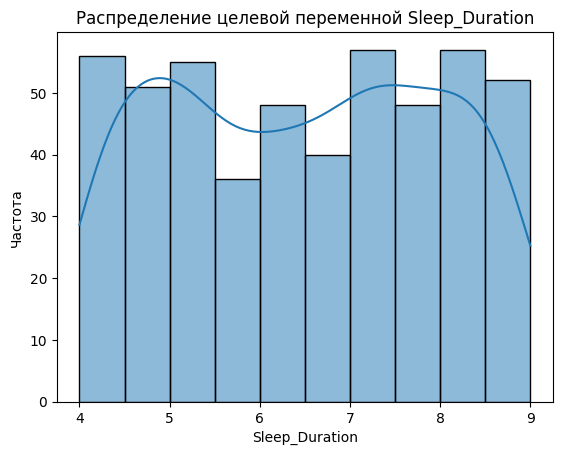

In [40]:
sns.histplot(data['Sleep_Duration'], kde=True)
plt.title('Распределение целевой переменной Sleep_Duration')
plt.xlabel('Sleep_Duration')
plt.ylabel('Частота')
plt.show()

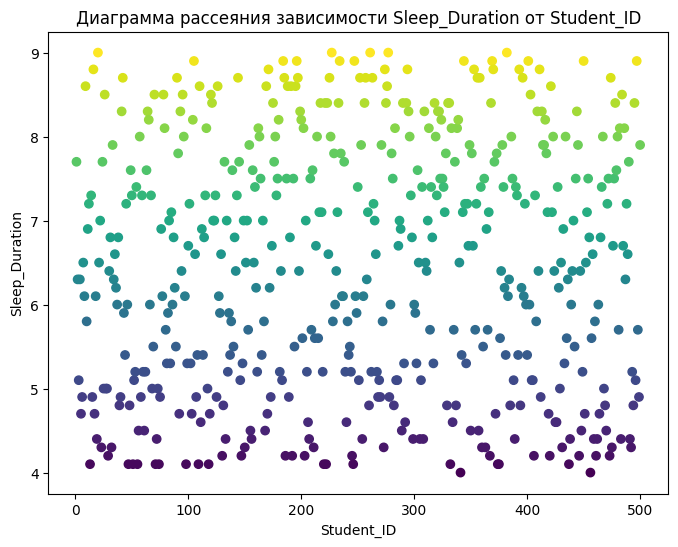

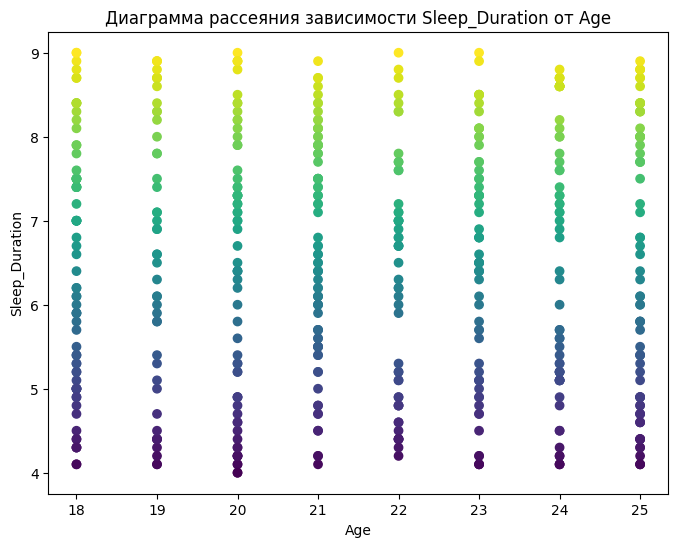

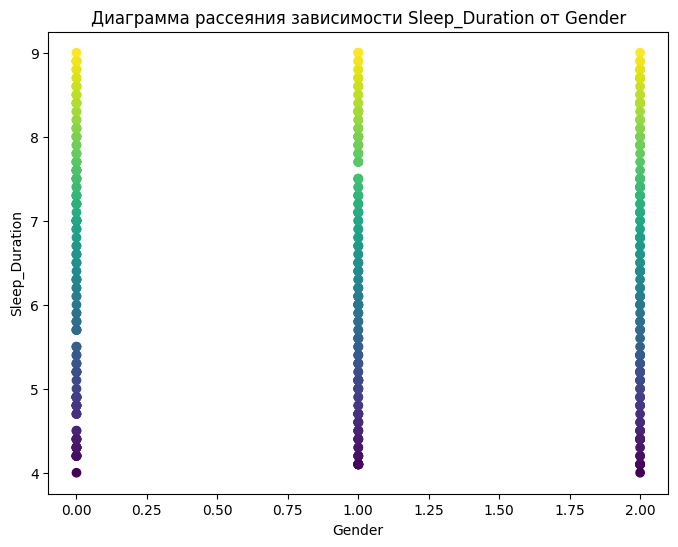

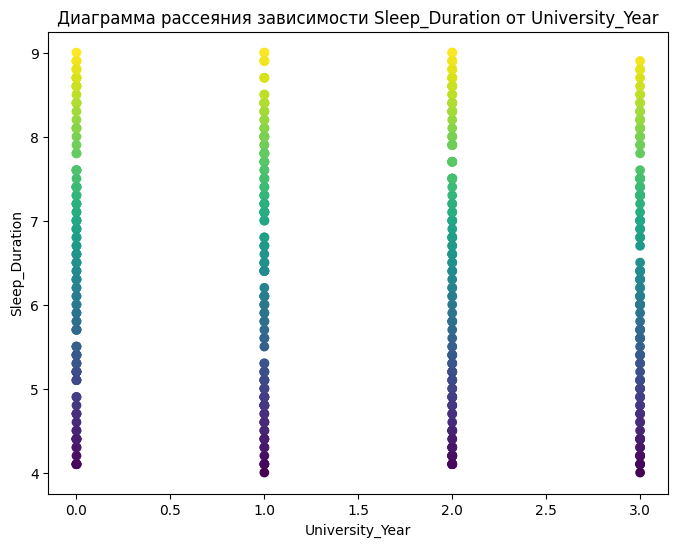

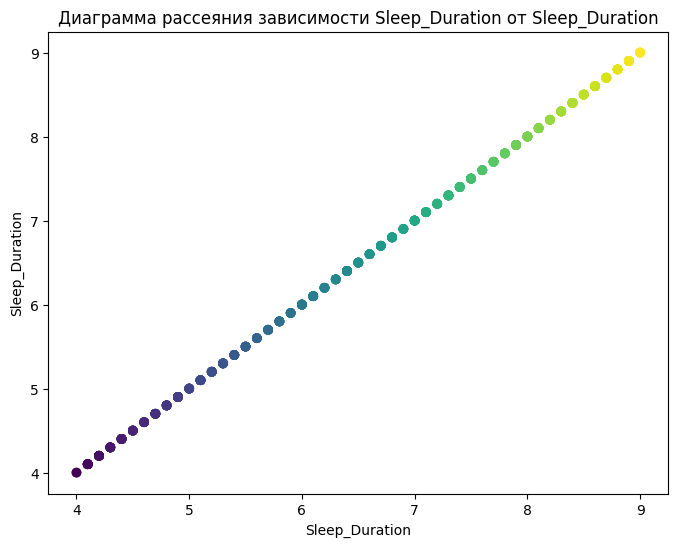

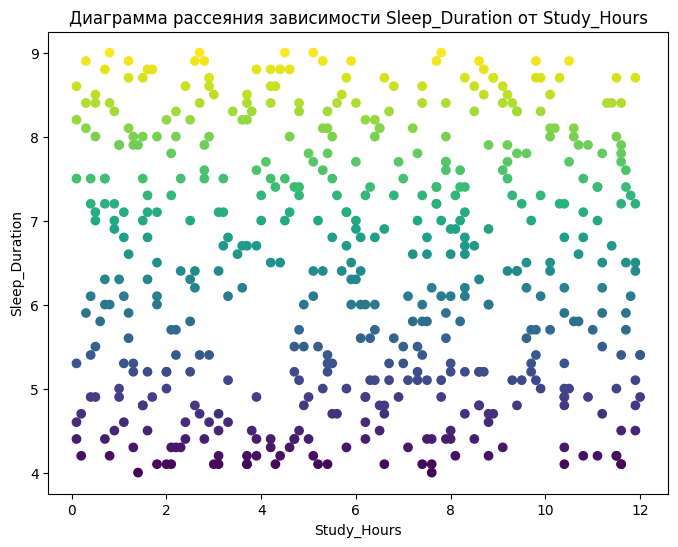

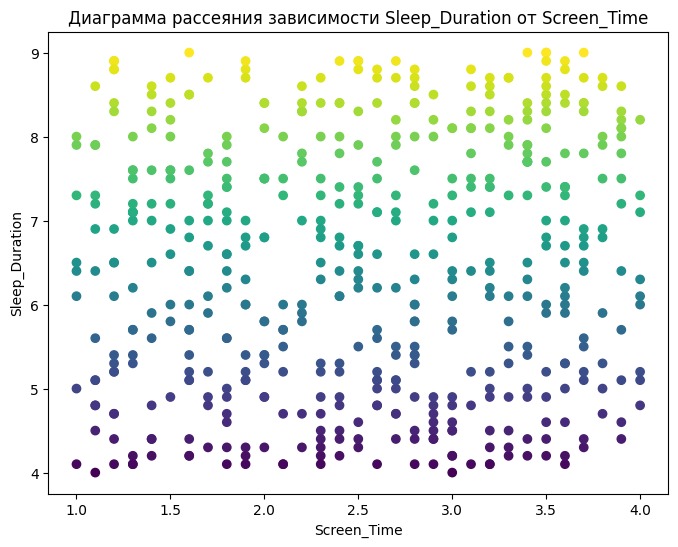

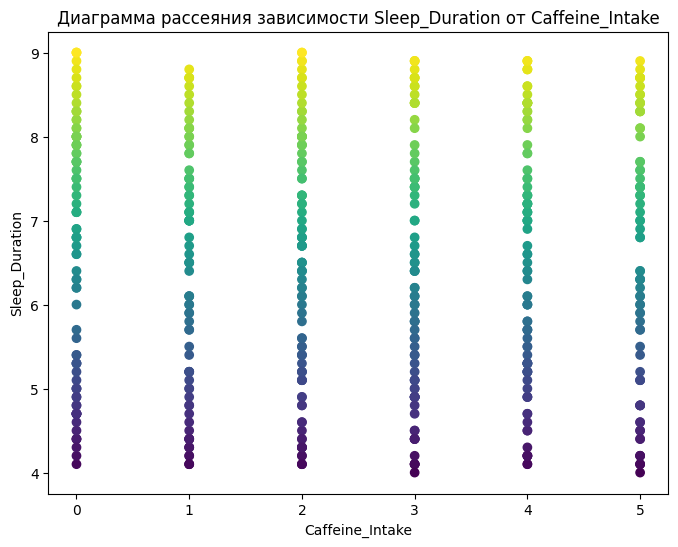

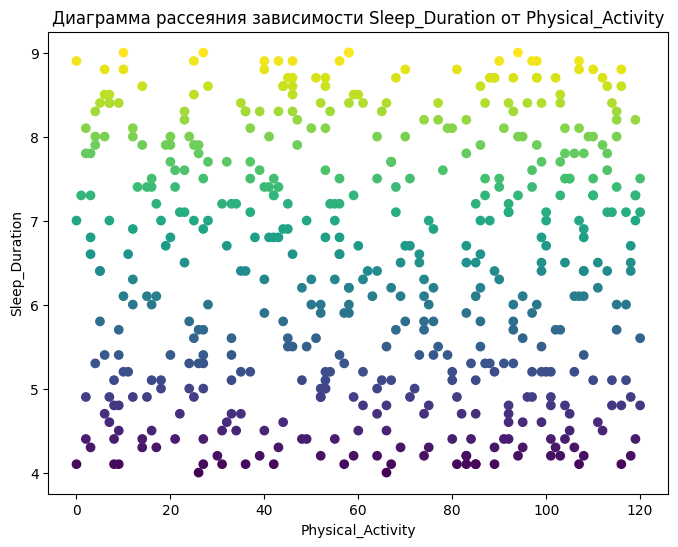

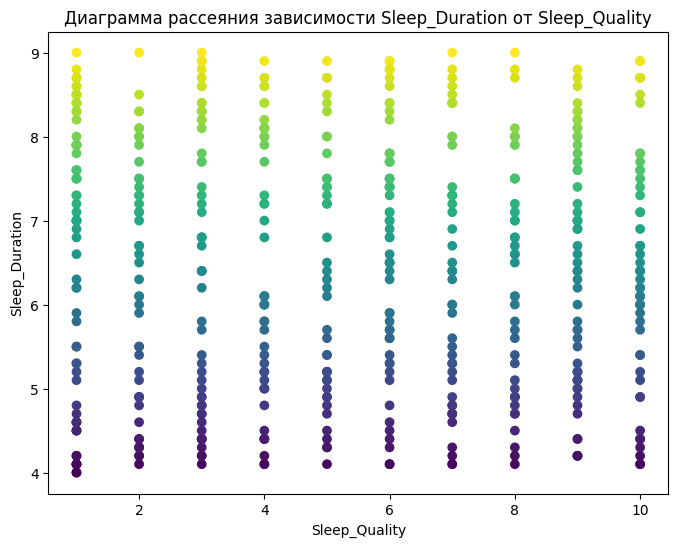

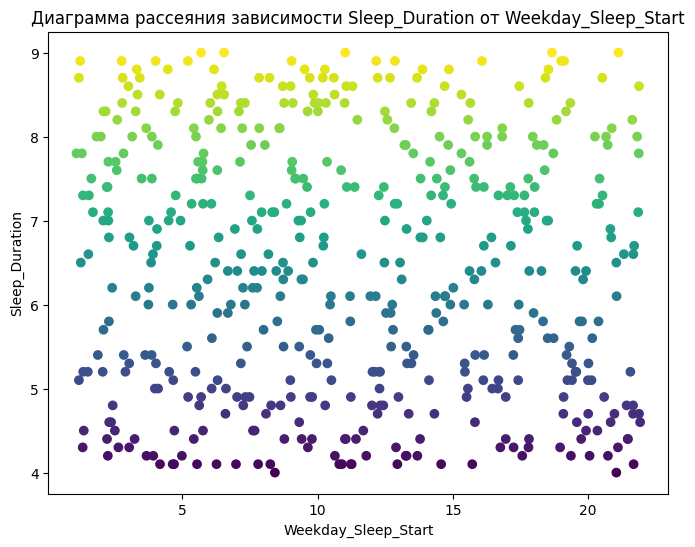

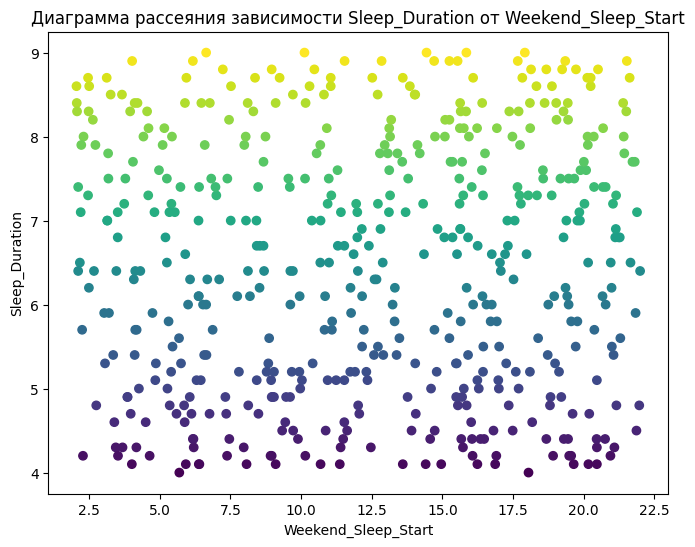

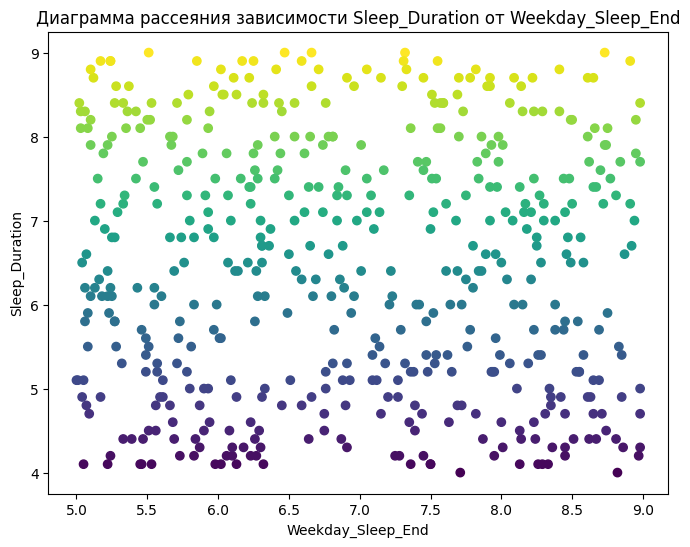

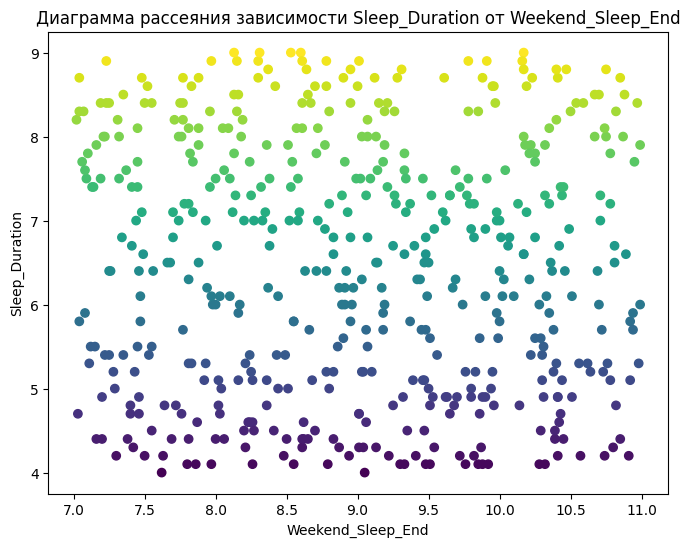

In [41]:
features = [
       'Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End'
]
target = 'Sleep_Duration'


for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data[target], c=data[target])
    plt.title(f'Диаграмма рассеяния зависимости Sleep_Duration от {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

Код функции, которая будет вычислять все нужные метрики

In [42]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

Подготовка датасета к обучению

In [43]:
X = data[features]
y = data['Sleep_Duration']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (500, 14) | y shape: (500,) 


Train Test разделение (80/20)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

Линейная регрессия

In [45]:
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pr_LR = modelLR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  0.0
  R2: 1.0
 Adjusted R2: 1.0
 Cross Validated R2: 1.0


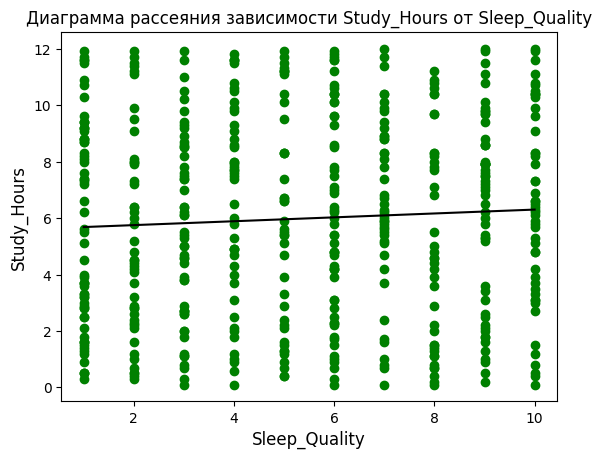

In [49]:
X2 = data['Sleep_Quality'].values[:,np.newaxis]
y2 = data['Study_Hours'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Study_Hours', size=12)
plt.xlabel('Sleep_Quality', size=12)
plt.title('Диаграмма рассеяния зависимости Study_Hours от Sleep_Quality')
plt.show()

Полиномиальная регрессия

In [47]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

modelPR = LinearRegression()
modelPR.fit(X_p_train, y_p_train)
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)


RMSE:  0.2743
  R2: 0.9666
 Adjusted R2: 1.0094
 Cross Validated R2: 0.9548


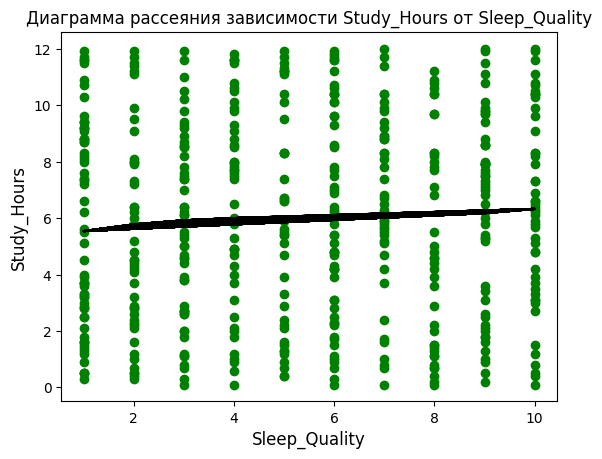

In [50]:
X2 = data['Sleep_Quality'].values[:,np.newaxis]
y2 = data['Study_Hours'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Study_Hours', size=12)
plt.xlabel('Sleep_Quality', size=12)
plt.title('Диаграмма рассеяния зависимости Study_Hours от Sleep_Quality')
plt.show()

Регрессия дерева принятия решений

In [51]:
modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.0141
  R2: 0.9999
 Adjusted R2: 0.9999
 Cross Validated R2: 1.0


Регрессия случайного леса

In [52]:
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.0101
  R2: 1.0
 Adjusted R2: 0.9999
 Cross Validated R2: 1.0


Регрессия опорных векторов (SVR)

In [53]:
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.4301
  R2: 0.0579
 Adjusted R2: -0.0972
 Cross Validated R2: 0.0001


In [54]:
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1.4758
  R2: -0.0032
 Adjusted R2: -0.1685
 Cross Validated R2: -0.0388


Регрессия ElasticNet

In [55]:
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train, y_train)
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.0663
  R2: 0.998
 Adjusted R2: 0.9976
 Cross Validated R2: 0.9979


Согласно метрикам, науличшими оказалась модели, построенная с помощью регрессии дерева принятия решений и случайного леса

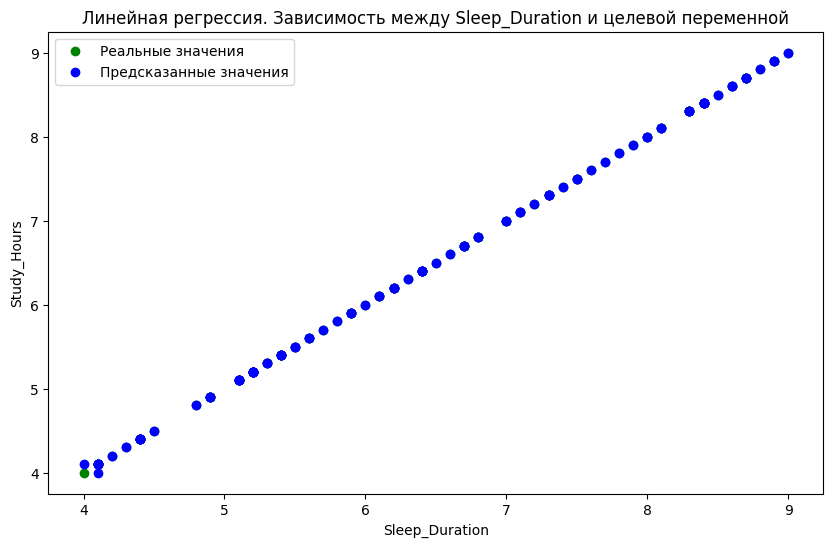

In [59]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test['Sleep_Duration'], y_test, color='g', label='Реальные значения')
plt.scatter(X_test['Sleep_Duration'], y_dt_pred, color='b', label='Предсказанные значения')
plt.xlabel('Sleep_Duration')
plt.ylabel('Study_Hours')
plt.title('Линейная регрессия. Зависимость между Sleep_Duration и целевой переменной')
plt.legend()
plt.show()

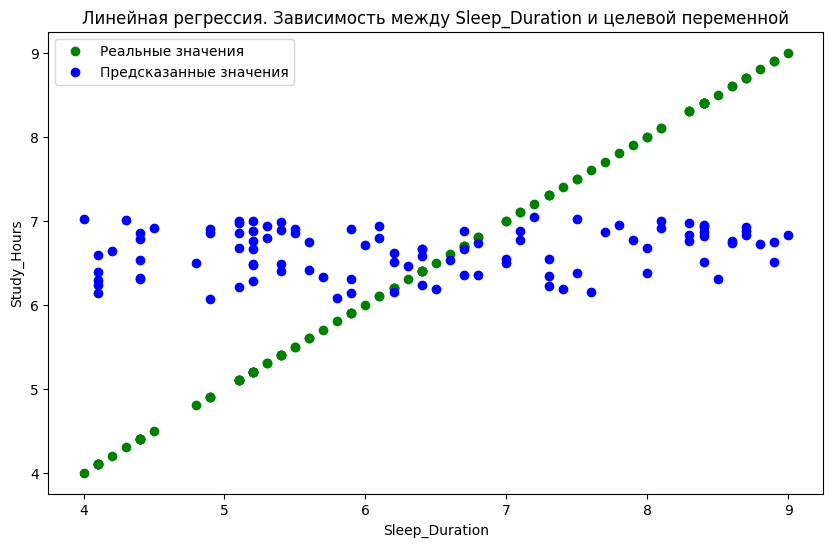

In [60]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test['Sleep_Duration'], y_test, color='g', label='Реальные значения')
plt.scatter(X_test['Sleep_Duration'], y_rf_pred, color='b', label='Предсказанные значения')
plt.xlabel('Sleep_Duration')
plt.ylabel('Study_Hours')
plt.title('Линейная регрессия. Зависимость между Sleep_Duration и целевой переменной')
plt.legend()
plt.show()